<a href="https://colab.research.google.com/github/dileepchandhra/MINI-PROJECT/blob/main/IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("sports cars" , limit=30 , output_dir='images',adult_filter_off=True)

In [ ]:
downloader.download("aeroplanes" , limit=30 , output_dir='images',adult_filter_off=True)

In [ ]:
downloader.download("ship" , limit=30 , output_dir='images',adult_filter_off=True)

In [8]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['aeroplanes' ,'ship' , 'sports cars']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR , category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    img_resized = resize(img_array , (150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

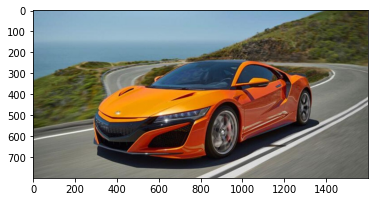

In [7]:
for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    plt.imshow(img_array)
    break

In [11]:
flat_data[0]

array([0.28235294, 0.4745098 , 0.81568627, ..., 0.48287146, 0.45934205,
       0.19673203])

In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

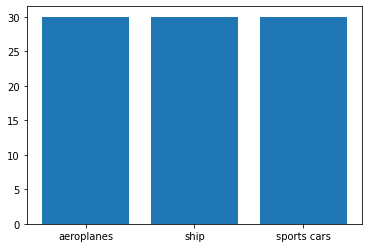

In [16]:

unique,count = np.unique(target , return_counts=True)
plt.bar(CATEGORIES,count);

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3 , random_state = 100)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 1, 0, 0])

In [21]:
y_test

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 1, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
accuracy_score(y_pred,y_test)

0.7407407407407407

In [24]:
confusion_matrix(y_pred,y_test)

array([[8, 1, 0],
       [4, 5, 0],
       [0, 2, 7]])

In [25]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [26]:
model = pickle.load(open('img_model.p','rb'))

Enter the the URLhttps://images.unsplash.com/photo-1525396524423-64f7b55f5b33?ixid=MXwxMjA3fDB8MHxzZWFyY2h8MXx8YWVyb3BsYW5lfGVufDB8fDB8&ixlib=rb-1.2.1&w=1000&q=80
(572, 1000, 3)
 PREDICTED OUTPUT: aeroplanes


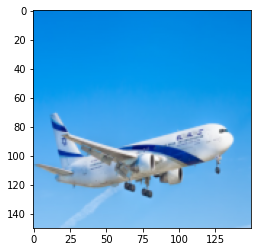

In [29]:
flat_data = []
url = input('Enter the the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter the the URLhttps://i.insider.com/5cbf50dfd1a2f8074406a8b2?width=700
(525, 700, 3)
 PREDICTED OUTPUT: ship


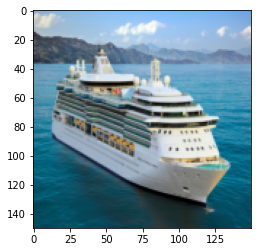

In [30]:
flat_data = []
url = input('Enter the the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter the the URLhttps://specials-images.forbesimg.com/imageserve/5d3703e2f1176b00089761a6/960x0.jpg?cropX1=836&cropX2=5396&cropY1=799&cropY2=3364
(540, 960, 3)
 PREDICTED OUTPUT: sports cars


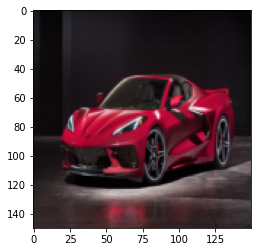

In [32]:
flat_data = []
url = input('Enter the the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')